In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [162]:
rest = pd.read_csv('/Volumes/Database/Research/ozone-budget/result_df_UKESM1_3_0_NN_width_32_dropout_0.1_22.csv')
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(1217).csv')

In [163]:
rest['CH₃O₂'].mean()/rest['HO₂'].mean()

8.359127681956188

In [277]:
rest['tas'] = data['tas']
rest['pan'] = data['pan']
rest['photo1d'] = data['photo1d']

rest['o3_mole'] = rest['o3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no_mole'] = rest['no']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no2_mole'] = rest['no2']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['oh_mole'] = rest['oh']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)*2
rest['h2o_mole'] = rest['h2o']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['hno3_mole'] = rest['hno3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['pan_mole'] = rest['pan']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['ho2_mole'] = rest['HO₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)*10/3.33
rest['ch3o2_mole'] = rest['CH₃O₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)*10/50
rest['o1d_mole'] = rest['O¹D']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/rest['tas'])
rest['k_oh_no2'] = 6.5*10**(-11)
rest['k_no_ho2'] = data['k_no_ho2']
rest['k_no_ch3o2'] = data['k_no_ch3o2']
rest['k_o1d_h2o'] = data['k_o1d_h2o']
rest['k_o3_ho2'] = data['k_o3_ho2']
rest['k_o3_oh'] = data['k_o3_oh']

In [278]:
rest['P1_HO2_NO'] = rest['k_no_ho2']*rest['no_mole']*rest['ho2_mole']
rest['P2_CH3O2_NO'] = rest['k_no_ch3o2']*rest['no_mole']*rest['ch3o2_mole']

rest['P3_O1D_H2O'] = rest['o1d_mole']*rest['h2o_mole']*rest['k_o1d_h2o']
rest['P4_OH_O3'] = rest['k_o3_oh']*rest['oh_mole']*rest['o3_mole']
rest['P5_HO2_O3'] = rest['k_o3_ho2']*rest['ho2_mole']*rest['o3_mole']

In [279]:
rest['P1'] = rest['P1_HO2_NO']/rest['PO₃̂']
rest['P2'] = rest['P2_CH3O2_NO']/rest['PO₃̂']

rest['P3'] = rest['P3_O1D_H2O']/rest['LO₃̂']
rest['P4'] = rest['P4_OH_O3']/rest['LO₃̂']
rest['P5'] = rest['P5_HO2_O3']/rest['LO₃̂']

In [280]:
rest['P1'].mean(), rest['P2'].mean()

(0.7302687963829095, 0.17663544206508514)

In [281]:
rest['P3'].mean(), rest['P4'].mean(), rest['P5'].mean()

(0.5375435575721639, 0.29281765517381175, 0.10148724910946962)

In [251]:
rest['HO2_OH'] = rest['ho2_mole']/rest['oh_mole']
rest['alpha'] = rest['P3_O1D_H2O']/rest['o3_mole']/rest['photo1d']

In [252]:
rest['alpha'].describe()

count    9.720000e+05
mean              inf
std               NaN
min      1.648376e-05
25%      3.121652e-02
50%      5.244204e-02
75%      7.152128e-02
max               inf
Name: alpha, dtype: float64

In [253]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
rest = rest.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
rest = rest.drop(['province','state'], axis=1)
rest_land = rest.dropna()
rest_land = rest_land[rest_land['latitude'] >= -60]

In [254]:
rest_land['PO₃̂'].mean(), rest_land['P1_HO2_NO'].mean(), rest_land['P2_CH3O2_NO'].mean()

(3594395.0853989683, 3688761.097687761, 377609.80769817746)

In [255]:
rest_land['LO₃̂'].mean(), rest_land['P3_O1D_H2O'].mean(), rest_land['P4_OH_O3'].mean(), rest_land['P5_HO2_O3'].mean()

(738245.375005773, 369171.30350412376, 915501.6646706595, 6350.643359830523)

In [256]:
rest_land['HO2_OH'].describe()

count    232140.000000
mean        118.259044
std         437.072523
min           0.015529
25%          11.004178
50%          32.888188
75%          97.544621
max       18483.501266
Name: HO2_OH, dtype: float64

In [257]:
rest_land.replace([np.inf, -np.inf], 0, inplace=True)
rest_land['alpha'].mean()

0.05916738292488353

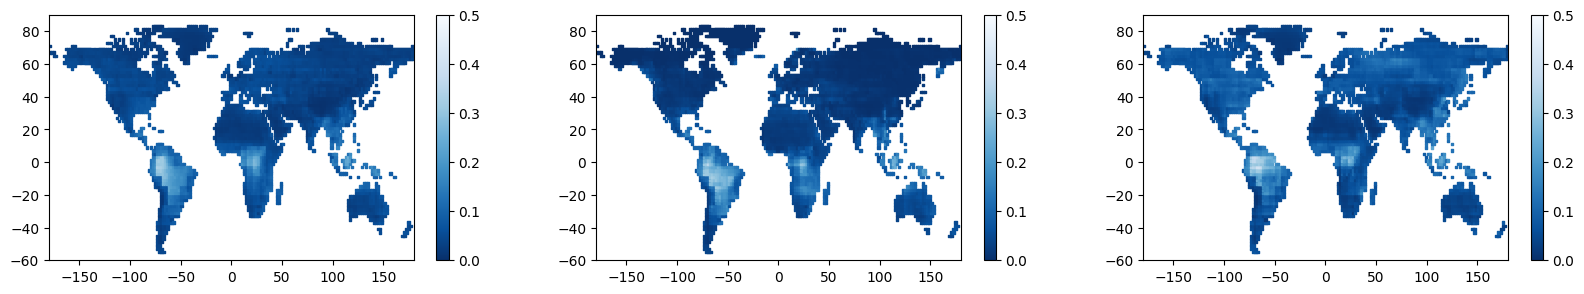

In [258]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(20, 3.25), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1,3,1)
rest_land['loc'] = rest_land['longitude']*1000 + rest_land['latitude']
rest_map = rest_land.groupby(['loc']).median()

cm = plt.cm.get_cmap('Blues_r')
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['alpha']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 90])
plt.colorbar(sc)

plt.subplot(1,3,2)
rest_map = rest_land[rest_land['t'] == 1]
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['alpha']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 90])
plt.colorbar(sc)

plt.subplot(1,3,3)
rest_map = rest_land[rest_land['t'] == 7]
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['alpha']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 90])
plt.colorbar(sc)

In [259]:
(rest_land['photo1d']*10**5).describe()

count    232140.000000
mean          0.640520
std           0.508678
min           0.000000
25%           0.149110
50%           0.546719
75%           1.105841
max           2.260958
Name: photo1d, dtype: float64

In [260]:
rest_summer = rest_land[rest_land['t']==8]
(rest_summer['photo1d']*10**5).describe()

count    3869.000000
mean        0.771212
std         0.422916
min         0.035800
25%         0.364639
50%         0.786056
75%         1.115958
max         1.889725
Name: photo1d, dtype: float64

In [261]:
rest_land['k_no_ho2'].mean()

1.261375569939883e-12

In [262]:
rest_land['k_no_ch3o2'].mean()

6.386602076330906e-13

In [263]:
rest_land['k_o3_oh'].mean()

6.086310924248261e-14

In [264]:
rest_land['k_o3_ho2'].mean()

1.4008385712356974e-17

In [265]:
rest_land['ho2_mole'].mean()

424014711.64931816

In [266]:
rest_land['ch3o2_mole'].mean()

164545560.78743225

In [267]:
rest_land['ho2_mole'].mean()/rest_land['ch3o2_mole'].mean()

2.5768833241091227

In [268]:
rest_land['ho2_mole'].mean()/rest_land['oh_mole'].mean()

33.23197434824964

In [269]:
rest_land['oh_mole'].mean()

12759239.255721541

In [270]:
rest_land['oh'].mean()*10**9

5.0980051293104614e-05